In [13]:
import pandas as pd

# Frequency by SDG word cluster
Using [osdg-mapping](https://github.com/osdg-ai/osdg-mapping)

## Read in the data

### Reports

In [45]:
reports = pd.read_csv('reports.csv', index_col=0)
reports.head()

,filepath,lang,text,number_of_pages
0,./reports/scraped/full/siemens-energy.pdf,eng,SIEMENS\nClaleigen4\n\nSustainability Report 2...,80
1,./reports/scraped/full/adidas-group.pdf,eng,\n\nPV p) | py). t)\nSUS\nds\nREPORT\n\n \n\n...,84


### [OSDG Ontology](https://github.com/osdg-ai/osdg-mapping)

In [46]:
ontology = pd.read_csv('OSDG-Ontology.csv')
ontology.head()

,Unnamed: 0,SDG label,FOS-ID,FOS-Name,Link to MAG
0,0,SDG_1,527821871,Access control,https://academic.microsoft.com/topic/527821871
1,1,SDG_1,2910993999,Anti-poverty program,https://academic.microsoft.com/topic/2910993999
2,2,SDG_1,2778151340,Asset poverty,https://academic.microsoft.com/topic/2778151340
3,3,SDG_1,196777733,Basic needs,https://academic.microsoft.com/topic/196777733
4,4,SDG_1,178511221,Basic service,https://academic.microsoft.com/topic/178511221


#### Use more Python friendly labels

In [47]:
ontology.rename(columns={'SDG label':'sdg_label','FOS-ID':'fos_id','FOS-Name':'fos_name','Link to MAG':'link_to_mag'}, inplace=True)
ontology['fos_name'] = ontology.fos_name.map(lambda name: name.lower()) # for later text search
ontology.head()

,Unnamed: 0,sdg_label,fos_id,fos_name,link_to_mag
0,0,SDG_1,527821871,access control,https://academic.microsoft.com/topic/527821871
1,1,SDG_1,2910993999,anti-poverty program,https://academic.microsoft.com/topic/2910993999
2,2,SDG_1,2778151340,asset poverty,https://academic.microsoft.com/topic/2778151340
3,3,SDG_1,196777733,basic needs,https://academic.microsoft.com/topic/196777733
4,4,SDG_1,178511221,basic service,https://academic.microsoft.com/topic/178511221


#### Define a function for counting words belonging to SDG's in the report text

In [48]:
# https://stackoverflow.com/questions/58234175/counting-a-list-of-specific-words-from-text-file-python#58235990
def count_words(text, cluster_dict):
    count_by_sdg = dict()

    for sdg in cluster_dict:
        total_count = 0
        for word in cluster_dict[sdg]:
            if word in text:
                total_count +=1

        count_by_sdg[sdg]=total_count

    return count_by_sdg

#### Create a dictionary from the ontology table like structure

In [49]:
labels = ontology['sdg_label'].unique()
sdg_clusters = ontology.groupby('sdg_label')['fos_name'].apply(list)
onto_dict = {}
for i in range(len(labels)):
    onto_dict[labels[i]] = sdg_clusters[i]
onto_dict['SDG_1'][:10]

['access control',
 'anti-poverty program',
 'asset poverty',
 'basic needs',
 'basic service',
 'begging',
 'below poverty line',
 'bottom of the pyramid',
 'cash transfers',
 'child poverty']

#### Save a dictionary containing the count per SDG cluster for each report

In [50]:
if 'sdg_count' not in reports.columns:
    for index, row in reports.iterrows():
        reports.at[index, 'sdg_count'] = str(count_words(row.text,onto_dict))
        reports.to_csv('reports.csv')

reports.head()

,filepath,lang,text,number_of_pages,sdg_count
0,./reports/scraped/full/siemens-energy.pdf,eng,SIEMENS\nClaleigen4\n\nSustainability Report 2...,80,"{'SDG_1': 4, 'SDG_2': 3, 'SDG_3': 33, 'SDG_4':..."
1,./reports/scraped/full/adidas-group.pdf,eng,\n\nPV p) | py). t)\nSUS\nds\nREPORT\n\n \n\n...,84,"{'SDG_1': 0, 'SDG_2': 3, 'SDG_3': 34, 'SDG_4':..."


### Plot the results

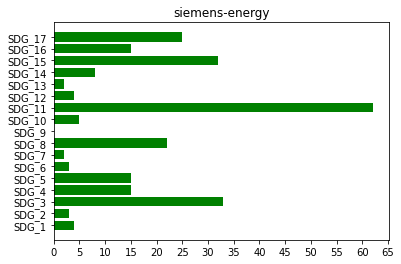

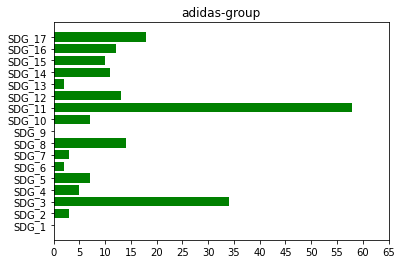

In [61]:
def extract_filename(filepath: str) -> str:
    filename = os.path.basename(filepath).split('.')
    return filename[0]

import matplotlib.pyplot as plt
import numpy as np
import ast
import os

%matplotlib inline
D = ast.literal_eval(reports.at[0, 'sdg_count'])
E = ast.literal_eval(reports.at[1, 'sdg_count'])
ind = np.arange(len(D))

for index, row in reports.iterrows():
    sdg_count = ast.literal_eval(row['sdg_count'])  # parse dict from string
    title = extract_filename(row['filepath'])
    plt.title(title)
    plt.barh(ind, list(sdg_count.values()), color='green')
    plt.yticks(ind, list(D.keys()), rotation=0)
    plt.xticks(np.arange(0,70, step=5))
    plt.savefig(f'SDG_classification_{title}.png')
    plt.show()
    
